# MS02_07_Random_Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_mfcc = pd.read_csv("df_mfcc.csv")
df_mfcc_mean = pd.read_csv("df_mfcc_mean.csv")

df_mfcc = df_mfcc.drop(['Unnamed: 0', 'gender', 'intensity'], axis = 1)
df_mfcc_mean = df_mfcc_mean.drop(['gender', 'intensity'],axis= 1)

### Mean MFCC 

In [3]:
from sklearn.model_selection import train_test_split

X_mfcc_mean = np.array(df_mfcc_mean.drop('emotion',1))

y_mfcc_mean = np.array(df_mfcc_mean['emotion'])

X_train_mfcc_mean,X_test_mfcc_mean,y_train_mfcc_mean,y_test_mfcc_mean = train_test_split(X_mfcc_mean,y_mfcc_mean,test_size=0.25,random_state=66)

/var/folders/b5/tcm__vq92md_0yg25bdy_dwc0000gn/T/ipykernel_7631/2134602876.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_mfcc_mean = np.array(df_mfcc_mean.drop('emotion',1))


In [4]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc_mean, y_train_mfcc_mean)
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 250}

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=250, max_features='auto',random_state=66)
rf.fit(X_train_mfcc_mean, y_train_mfcc_mean)
rf_predictor = rf.predict(X_test_mfcc_mean)
rf_accuracy=accuracy_score(y_true=y_test_mfcc_mean, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 79.17%


In [6]:
from sklearn.metrics import f1_score

print("f1 score mean mfcc: {:.2f}%".format(f1_score(y_test_mfcc_mean, rf_predictor, average="weighted")*100))

f1 score mean mfcc: 78.99%


/Users/jessicaduffield/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


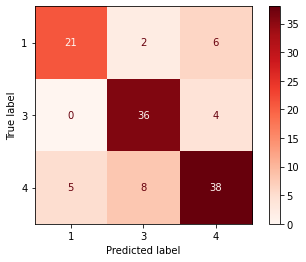

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc_mean, y_test_mfcc_mean, cmap=plt.cm.Reds)
plt.show()

### Mean Normalised MFCC

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

X_mfcc_mean = np.array(df_mfcc_mean.drop('emotion',1))

y_mfcc_mean = np.array(df_mfcc_mean['emotion'])

X_train_mfcc_mean,X_test_mfcc_mean,y_train_mfcc_mean,y_test_mfcc_mean = train_test_split(X_mfcc_mean,y_mfcc_mean,test_size=0.25,random_state=66)

X_train_mfcc_mean_norm = normalize(X_train_mfcc_mean, norm='l2')
X_test_mfcc_mean_norm = normalize(X_test_mfcc_mean, norm='l2')

/var/folders/b5/tcm__vq92md_0yg25bdy_dwc0000gn/T/ipykernel_7631/2121577388.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_mfcc_mean = np.array(df_mfcc_mean.drop('emotion',1))


In [10]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc_mean_norm, y_train_mfcc_mean)
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_mfcc_mean_norm, y_train_mfcc_mean)
rf_predictor = rf.predict(X_test_mfcc_mean_norm)
rf_accuracy=accuracy_score(y_true=y_test_mfcc_mean, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 74.17%


In [13]:
from sklearn.metrics import f1_score

print("f1 score norm mean mfcc: {:.2f}%".format(f1_score(y_test_mfcc_mean, rf_predictor, average="weighted")*100))

f1 score norm mean mfcc: 74.06%


/Users/jessicaduffield/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


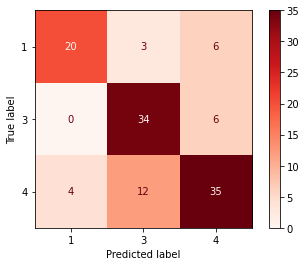

In [14]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc_mean_norm, y_test_mfcc_mean, cmap=plt.cm.Reds)
plt.show()

### Raw MFCC

In [15]:
from sklearn.model_selection import train_test_split

X_mfcc = np.array(df_mfcc.drop('emotion',1))

y_mfcc = np.array(df_mfcc['emotion'])

X_train_mfcc,X_test_mfcc,y_train_mfcc,y_test_mfcc = train_test_split(X_mfcc,y_mfcc,test_size=0.25,random_state=66)

/var/folders/b5/tcm__vq92md_0yg25bdy_dwc0000gn/T/ipykernel_7631/2904001863.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_mfcc = np.array(df_mfcc.drop('emotion',1))


In [16]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc, y_train_mfcc)
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_mfcc, y_train_mfcc)
rf_predictor = rf.predict(X_test_mfcc)
rf_accuracy=accuracy_score(y_true=y_test_mfcc, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 70.00%


In [27]:
from sklearn.metrics import f1_score

print("f1 score raw mfcc: {:.2f}%".format(f1_score(y_test_mfcc, rf_predictor, average="weighted")*100))

f1 score raw mfcc: 68.32%


/Users/jessicaduffield/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


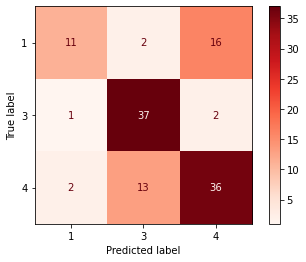

In [19]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc, y_test_mfcc, cmap=plt.cm.Reds)
plt.show()

### Raw Normalised MFCC

In [20]:
from sklearn.model_selection import train_test_split

X_mfcc = np.array(df_mfcc.drop('emotion',1))

y_mfcc = np.array(df_mfcc['emotion'])

X_train_mfcc,X_test_mfcc,y_train_mfcc,y_test_mfcc = train_test_split(X_mfcc,y_mfcc,test_size=0.25,random_state=66)

X_train_mfcc_norm = normalize(X_train_mfcc, norm='l2')
X_test_mfcc_norm = normalize(X_test_mfcc, norm='l2')

/var/folders/b5/tcm__vq92md_0yg25bdy_dwc0000gn/T/ipykernel_7631/1107300198.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_mfcc = np.array(df_mfcc.drop('emotion',1))


In [21]:
# using GridSearchCV to find optimal number of n_estimators and max_features

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=66)

param_grid = { 
    'n_estimators': [100,250,500,1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
}
CV_rfc = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3)
CV_rfc.fit(X_train_mfcc_norm, y_train_mfcc)
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=1000, max_features='auto',random_state=66)
rf.fit(X_train_mfcc_norm, y_train_mfcc)
rf_predictor = rf.predict(X_test_mfcc_norm)
rf_accuracy=accuracy_score(y_true=y_test_mfcc, y_pred=rf_predictor)

print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 69.17%


In [23]:
from sklearn.metrics import f1_score

print("f1 score raw norm mfcc: {:.2f}%".format(f1_score(y_test_mfcc, rf_predictor, average="weighted")*100))

f1 score raw norm mfcc: 65.95%


/Users/jessicaduffield/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


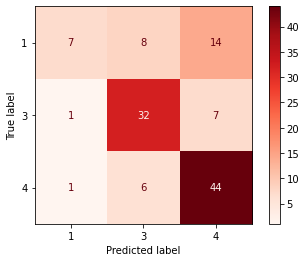

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test_mfcc_norm, y_test_mfcc, cmap=plt.cm.Reds)
plt.show()